## Getting Started with Robosuite


<center><img src="media/gallery_logo.jpg" width="400" height="300"></center>

This tutorial walks through installing robosuite, spinning up a simulation, rolling out a simple policy, and exploring custom robotics manipulation tasks.

### Background
Robosuite is an open-source simulation framework developed by the Stanford Vision and Learning Lab in 2017 for research in robot learning and manipulation. It is actively maintained by the NVidia GEAR Lab, SVL, and UT Austin Robot Perception Laboratory (RPL). Robosuite serves as a unified SDK that integrates custom environments, fast policy iteration, 

**What it offers**
* *Standardized Tasks*: set of standardized manipulation tasks used for benchmarking
* *Modularized Generation*: modular APIs to custom create new environments, tasks, objects, robot models, arenas
* *Robot Controllers*: joint-space velocity, inverse kinematic control, operational space control, whole body control
* *Teleoperation Devices*: keyboard, spacemouse, dualsenese, MuJoCo viewer drag-drop
* *Multi-modal Sensors*: low-level physical states, RGB cameras, depth maps, and proprioception
* *Human Demonstrations*: tools to collect expert demonstrations and replaying demonstration datasets
* *Photorealistic Rendering*: integration with NVIDIA Isaac Sim rendering.

### Installation
**Prerequisites**
* Python 3.8+ with pip
* MuJoCo physics engine `pip install mujoco`
* `imageio` for saving rollouts as GIF/MP4
* Linux Virtual Machine 22.04 LTS

Note: In general, it is preferred to run Robotics setups on Linux or a Linux VM. However, for the purposes of this tutorial I will only show demonstrations on how to use these APIs on MacOS for simplicity. 

## Getting Started with Robosuite


<center><img src="media/gallery_logo.jpg" width="400" height="300"></center>

This tutorial walks through installing robosuite, spinning up a simulation, rolling out a simple policy, and exploring custom robotics manipulation tasks.

### Background
Robosuite is an open-source simulation framework developed by the Stanford Vision and Learning Lab in 2017 for research in robot learning and manipulation. It is actively maintained by the NVidia GEAR Lab, SVL, and UT Austin Robot Perception Laboratory (RPL). Robosuite serves as a unified SDK that integrates 

**What it offers**
* *Standardized Tasks*: set of standardized manipulation tasks used for benchmarking
* *Modularized Generation*: modular APIs to custom create new environments, tasks, objects, robot models, arenas
* *Robot Controllers*: joint-space velocity, inverse kinematic control, operational space control, whole body control
* *Teleoperation Devices*: keyboard, spacemouse, dualsenese, MuJoCo viewer drag-drop
* *Multi-modal Sensors*: low-level physical states, RGB cameras, depth maps, and proprioception
* *Human Demonstrations*: tools to collect expert demonstrations and replaying demonstration datasets
* *Photorealistic Rendering*: integration with NVIDIA Isaac Sim rendering.

### Installation
**Prerequisites**
* Python 3.8+ with pip
* MuJoCo physics engine `pip install mujoco`
* `imageio` for saving rollouts as GIF/MP4

Note: In general, it is preferred to run Robotics setups on Linux or a Linux VM. However, for the purposes of this tutorial I will only show demonstrations on how to use these APIs on MacOS for simplicity. 

In [1]:
%pip install --quiet --upgrade robosuite robosuite_models mujoco imageio numpy "imageio[ffmpeg]" "imageio[pyav]"

Note: you may need to restart the kernel to use updated packages.


Verify the installation...

In [2]:
import robosuite 
import mujoco

print(f"robosuite version: {robosuite.__version__}")
print(f"mujoco version: {mujoco.__version__}")

[robosuite WARNING] No private macro file found! (macros.py:57)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:58)
[robosuite WARNING] To setup, run: python /Users/jwei302/Dev/robosuite/robosuite/scripts/setup_macros.py (macros.py:59)


robosuite version: 1.5.1
mujoco version: 3.3.7


### Basics
In this section, we will explore the basics of what Robosuite has to offer. We will look first render the canonical example of the `Lift` task with a Panda arm. Then, we will look a few robot models that Robosuite has to offer. Finally, we will look at the different benchmark tasks. 

We'll use the classic `Lift` task with a Panda arm render an image. For simplicity, we let `has_renderer=False` since this uses MuJoCo's on-screen renderer which uses OpenGL and requires `mjpython`. Instead, we use `has_offscreen_renderer` to render frames directly in pixel space.  

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment created successfully!
Action dimension: 7
Action spec (low, high): (array([-1., -1., -1., -1., -1., -1., -1.]), array([1., 1., 1., 1., 1., 1., 1.]))
Reset complete. Observation keys: ['robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_joint_acc', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_quat_site', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'cube_pos', 'cube_quat', 'gripper_to_cube_pos', 'robot0_proprio-state', 'object-state']
Rendered frame shape: (512, 512, 3)


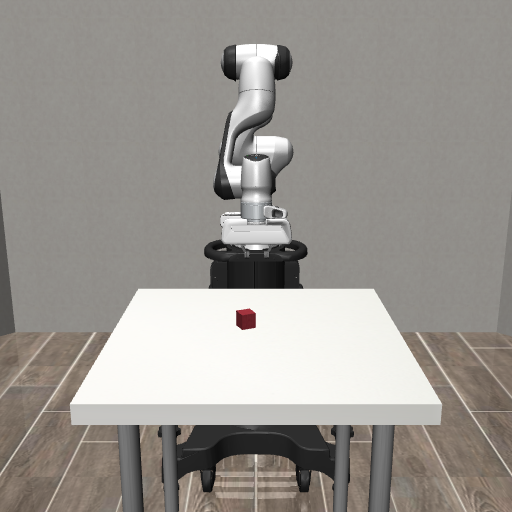

In [11]:
import numpy as np
import robosuite as suite
from robosuite.controllers import load_composite_controller_config
from PIL import Image

# Load controller configuration for Panda robot
controller_config = load_composite_controller_config(robot="Panda")

# Create the Lift environment with Panda arm
env = suite.make(
    env_name="Lift",
    robots="Panda",
    controller_configs=controller_config,
    has_renderer=False,  # Disabled for Mac compatibility
    has_offscreen_renderer=True,  # Enable for image capture
    use_camera_obs=False, 
    control_freq=20,
    horizon=5000,
    camera_names="frontview"  # Specify camera for rendering
)

print("Environment created successfully!")
print(f"Action dimension: {env.action_dim}")
print(f"Action spec (low, high): {env.action_spec}")

# Reset environment
obs = env.reset()
print(f"Reset complete. Observation keys: {list(obs.keys())}")

# Render using sim renderer directly
env.sim.render(camera_name="frontview", height=512, width=512)
frame = env.sim.render(camera_name="frontview", height=512, width=512)
print(f"Rendered frame shape: {frame.shape}")

# Display the frame
display(Image.fromarray(frame).rotate(180))


We can visualize from different angles...

Available cameras: ('frontview', 'birdview', 'agentview', 'sideview', 'robot0_robotview', 'robot0_eye_in_hand')
Frontview:


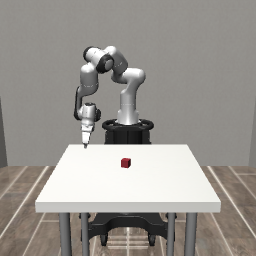

Birdview:


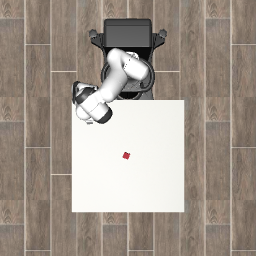

Agentview:


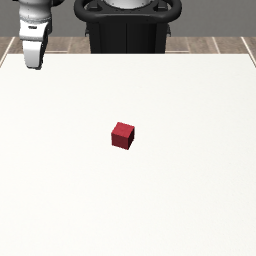

Sideview:


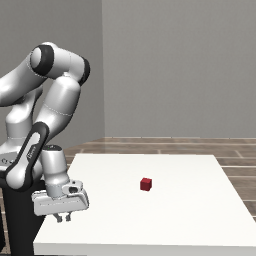

Environment closed.


In [ ]:
import numpy as np

# List available cameras
print("Available cameras:", env.sim.model.camera_names)

# Try different camera views
camera_views = ["frontview", "birdview", "agentview", "sideview"]

for cam_name in camera_views:
    if cam_name in env.sim.model.camera_names:
        frame = env.sim.render(camera_name=cam_name, height=512, width=512)
        print(f"{cam_name.capitalize()}:")
        display(Image.fromarray(frame).rotate(180))

env.close()
print("Environment closed.")

We can use different robot models. Here we render `Panda, Sawyer, UR5e, Kinova3`. 

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)



Creating environment with robot: Panda
Rendered frame shape for Panda: (512, 512, 3)


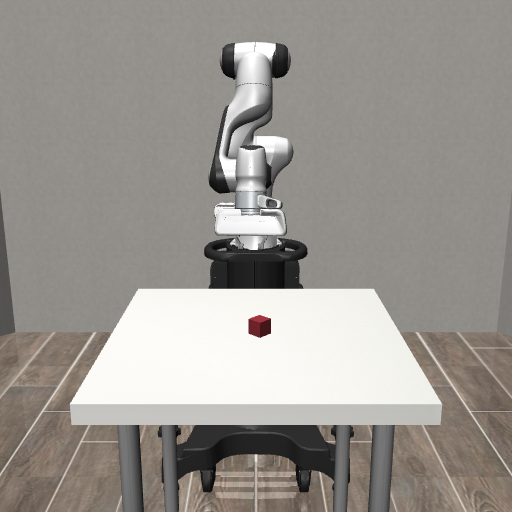

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_sawyer.json (composite_controller_factory.py:121)


Environment with Panda closed.

Creating environment with robot: Sawyer
Rendered frame shape for Sawyer: (512, 512, 3)


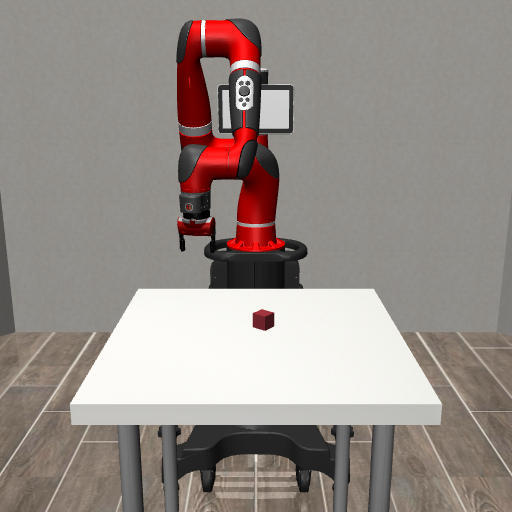

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_ur5e.json (composite_controller_factory.py:121)


Environment with Sawyer closed.

Creating environment with robot: UR5e
Rendered frame shape for UR5e: (512, 512, 3)


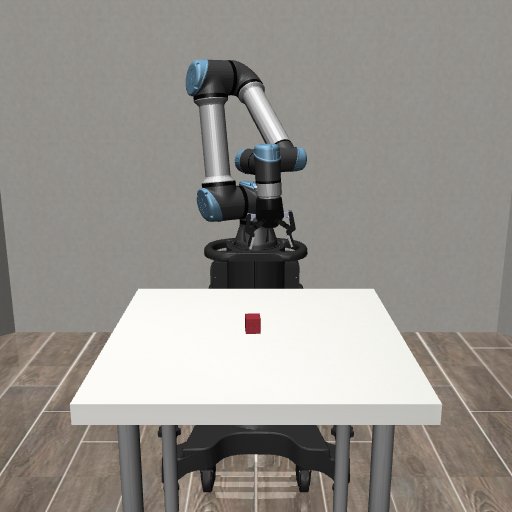

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_kinova3.json (composite_controller_factory.py:121)


Environment with UR5e closed.

Creating environment with robot: Kinova3
Rendered frame shape for Kinova3: (512, 512, 3)


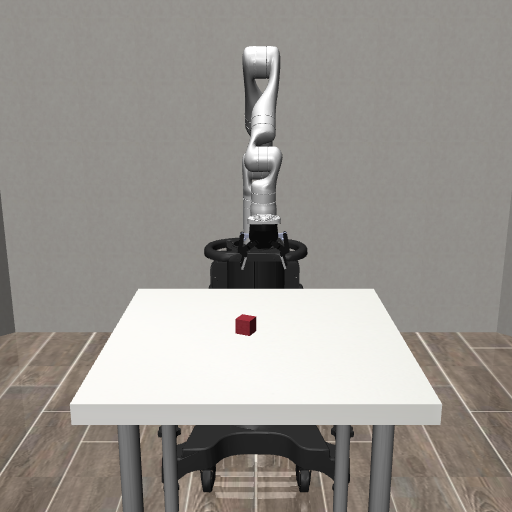

Environment with Kinova3 closed.


In [14]:
robots = ["Panda", "Sawyer", "UR5e", "Kinova3"]
for robot in robots:
    print(f"\nCreating environment with robot: {robot}")
    
    controller_config = load_composite_controller_config(robot=robot)
    
    env = suite.make(
        env_name="Lift",
        robots=robot,
        controller_configs=controller_config,
        has_renderer=False,
        has_offscreen_renderer=True,
        use_camera_obs=False,
        control_freq=20,
        horizon=5000,
        camera_names="frontview"
    )
    
    obs = env.reset()
    frame = env.sim.render(camera_name="frontview", height=512, width=512)
    print(f"Rendered frame shape for {robot}: {frame.shape}")
    display(Image.fromarray(frame).rotate(180))
    
    env.close()
    print(f"Environment with {robot} closed.")

Robosuite conveniently has defined around 10 benchmarking tasks. Here we visualize four of them.

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)



Creating environment for task: Lift
Rendered frame shape for Lift: (512, 512, 3)


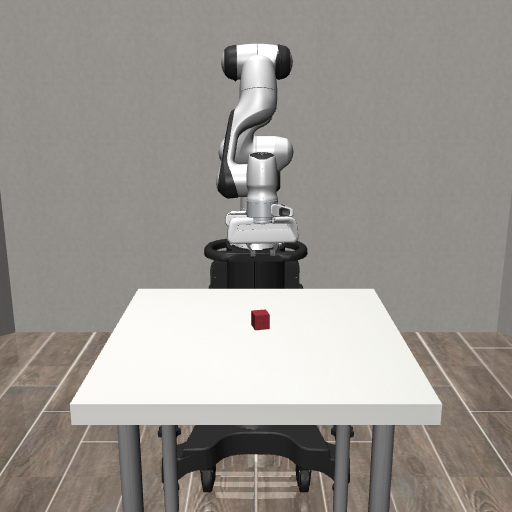

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment for Lift closed.

Creating environment for task: Stack
Rendered frame shape for Stack: (512, 512, 3)


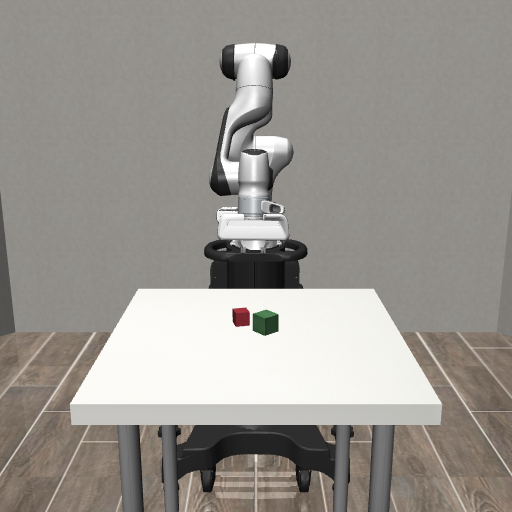

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment for Stack closed.

Creating environment for task: Door


[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Rendered frame shape for Door: (512, 512, 3)


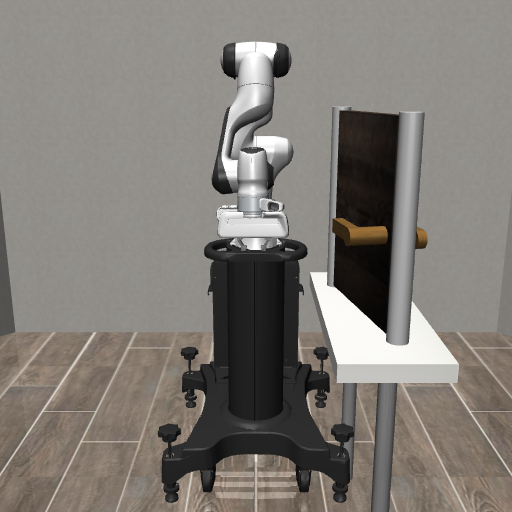

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment for Door closed.

Creating environment for task: NutAssembly
Rendered frame shape for NutAssembly: (512, 512, 3)


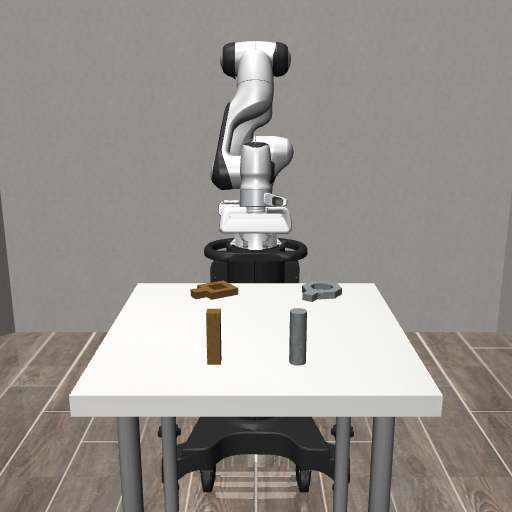

Environment for NutAssembly closed.


In [15]:
benchmark_tasks = ["Lift", "Stack", "Door", "NutAssembly"]

task_info = []

for task in benchmark_tasks:
    print(f"\nCreating environment for task: {task}")

    env = suite.make(
        env_name=task,
        robots="Panda",
        has_renderer=False,
        has_offscreen_renderer=True,
        use_camera_obs=False,
        control_freq=20,
        horizon=5000,
        camera_names="frontview"
    )
    obs = env.reset()
    frame = env.sim.render(camera_name="frontview", height=512, width=512)
    print(f"Rendered frame shape for {task}: {frame.shape}")
    display(Image.fromarray(frame).rotate(180))

    env.close()
    print(f"Environment for {task} closed.")

### Recording Rollouts with a Scripted Policy

Let's implement a simple scripted policy that attempts to complete the Lift task. The policy will:
1. Move towards the cube
2. Descend to grasp height
3. Close the gripper
4. Lift the cube

We'll record the entire episode and save it as a video.

In [9]:
import imageio

# Create a new environment for the scripted policy demo
controller_config = load_composite_controller_config(robot="Panda")

env = suite.make(
    env_name="Lift",
    robots="Panda",
    controller_configs=controller_config,
    has_renderer=False,
    has_offscreen_renderer=True,
    use_camera_obs=False,
    control_freq=20,
    horizon=1000,
    reward_shaping=True,  # Use dense rewards to see progress
)

def lift_policy(obs, phase, step_in_phase):
    """
    A simple scripted policy for the Lift task.
    
    Phases:
    0: Move towards cube (xy)
    1: Descend to cube height
    2: Close gripper
    3: Lift cube
    4: Hold
    """
    # Get robot end-effector position and cube position
    ee_pos = obs["robot0_eef_pos"]  # End-effector position
    cube_pos = obs["cube_pos"]  # Cube position
    
    # Action: [dx, dy, dz, droll, dpitch, dyaw, gripper]
    # For IK controller, this is delta position + gripper
    action = np.zeros(7)
    
    # Proportional control gains
    k_pos = 2.0
    
    if phase == 0:  # Move towards cube in XY
        action[0] = k_pos * (cube_pos[0] - ee_pos[0])  # dx
        action[1] = k_pos * (cube_pos[1] - ee_pos[1])  # dy
        action[2] = k_pos * max(0, (cube_pos[2] + 0.05) - ee_pos[2])  # dz (stay above)
        action[6] = 1  # Keep gripper open
        
    elif phase == 1:  # Descend to grasp height
        action[0] = k_pos * (cube_pos[0] - ee_pos[0])
        action[1] = k_pos * (cube_pos[1] - ee_pos[1])
        action[2] = k_pos * ((cube_pos[2] - 0.01) - ee_pos[2])  # Slightly below cube top
        action[6] = 1  # Keep gripper open
        
    elif phase == 2:  # Close gripper
        action[6] = -1  # Close gripper
        
    elif phase == 3:  # Lift
        action[2] = 0.5  # Move up
        action[6] = -1  # Keep gripper closed
        
    else:  # Hold
        action[2] = 0.0
        action[6] = -1  # Keep gripper closed
    
    # Clip actions to valid range
    low, high = env.action_spec
    action = np.clip(action, low, high)
    
    return action

# Run the scripted policy and record
obs = env.reset()
frames = []
total_reward = 0.0

# State machine for phases
phase = 0
steps_in_phase = 0
phase_durations = [100, 100, 100, 100, 100]  # Steps for each phase, total = 500

print("Starting scripted policy rollout...")

for step in range(500):
    # Get action from scripted policy
    action = lift_policy(obs, phase, steps_in_phase)
    
    # Step environment
    obs, reward, done, info = env.step(action)
    total_reward += reward
    
    # Render and store frame
    frame = env.sim.render(camera_name="frontview", height=512, width=512)
    rotated_frame = np.rot90(frame, k=2)  # Rotate 180 degrees
    frames.append(rotated_frame)

    # Update phase
    steps_in_phase += 1
    if steps_in_phase >= phase_durations[phase] and phase < len(phase_durations) - 1:
        phase += 1
        steps_in_phase = 0
        print(f"Step {step}: Moving to phase {phase}")
    
    if done:
        print(f"Episode finished at step {step}")
        break

print(f"Total reward: {total_reward:.3f}")
print(f"Recorded {len(frames)} frames")

# Save as video
video_path = "media/lift_rollout.mp4"
imageio.mimsave(video_path, frames, fps=20)
print(f"Video saved to {video_path}")

env.close()
print("Environment closed.")

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Starting scripted policy rollout...
Step 99: Moving to phase 1
Step 199: Moving to phase 2
Step 299: Moving to phase 3
Step 399: Moving to phase 4
Total reward: 60.148
Recorded 500 frames
Video saved to media/lift_rollout.mp4
Environment closed.


There are a lot more features to Robosuite that I have not covered. Refer to their [documentation](https://robosuite.ai/docs/index.html) for more details

## Getting Started with Roboverse

